### Logistic regression (XOR)

In [1]:
import random
from math import exp, log
import numpy as np
import matplotlib.pyplot as plt

### Data preparation

In [2]:
X = np.array([(0,0),(1,0),(0,1),(1,1)])
Y = np.array([0,1,1,0])
epoch_array = np.array([])
cost_array = np.array([])

### Model

In [3]:
class logistic_regression_model():
    def __init__(self):
        self.w = np.random.normal(size = 2)
        self.b = np.random.normal(size = 1)
        
    def sigmoid(self, z):
        return 1/(1 + exp(-z))
    
    def predict(self, x):
        z = np.inner(self.w, x) + self.b
        a = self.sigmoid(z)
        return a

In [4]:
model = logistic_regression_model()

### Training

In [5]:
def train(X, Y, model, lr):
    dw0 = 0.0
    dw1 = 0.0
    db = 0.0
    m = len(X)
    cost = 0.0
    for x,y in zip(X,Y):
        a = model.predict(x)
        if y == 1:
            cost -= log(a)
        else:
            cost -= log(1-a)
        
        dw0 += np.multiply(a-y, x[0])
        dw1 += np.multiply(a-y, x[1])
        db += (a-y)
        
    cost /= m
    model.w[0] -= lr * dw0/m
    model.w[1] -= lr * dw1/m
    model.b -= lr * db/m
    
    return cost

In [6]:
for epoch in range(10000):
    cost = train(X, Y, model, 0.1)
    epoch_array = np.append(epoch_array, epoch)
    cost_array = np.append(cost_array, cost)
    if epoch % 100 == 0:
        print(epoch, cost)

0 0.8538526488419824
100 0.7007985412613527
200 0.6961998181911857
300 0.6944193043658022
400 0.6936925552051159
500 0.693385829928145
600 0.6932530930251477
700 0.6931946275592166
800 0.6931685663510854
900 0.6931568577123843
1000 0.6931515704720641
1100 0.69314917514005
1200 0.6931480877131556
1300 0.6931475934006662
1400 0.6931473685157447
1500 0.6931472661525895
1600 0.693147219543782
1700 0.6931471983171656
1800 0.6931471886488904
1900 0.6931471842448425
2000 0.6931471822386305
2100 0.6931471813246957
2200 0.6931471809083422
2300 0.6931471807186652
2400 0.6931471806322538
2500 0.6931471805928873
2600 0.6931471805749528
2700 0.6931471805667824
2800 0.6931471805630601
2900 0.6931471805613643
3000 0.6931471805605918
3100 0.6931471805602398
3200 0.6931471805600795
3300 0.6931471805600063
3400 0.6931471805599732
3500 0.693147180559958
3600 0.6931471805599511
3700 0.6931471805599478
3800 0.6931471805599465
3900 0.6931471805599458
4000 0.6931471805599455
4100 0.6931471805599454
4200 0.69

(0.0, 2.0)

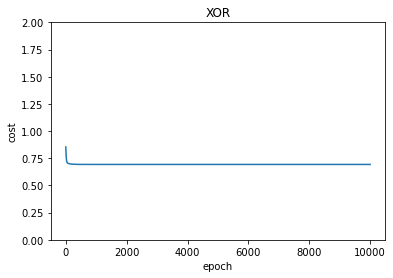

In [7]:
plt.plot(epoch_array, cost_array)
plt.xlabel('epoch')
plt.ylabel('cost')
plt.title('XOR')
plt.ylim([0, 2])

### Testing

In [7]:
model.predict((0,0))

0.5

In [8]:
model.predict((0,1))

0.5

In [9]:
model.predict((1,0))

0.5

In [10]:
model.predict((1,1))

0.5